# **TD : Ingénierie des Connaissances**     (AIT OUAKOUR AYOUB)

EXERCICE 1

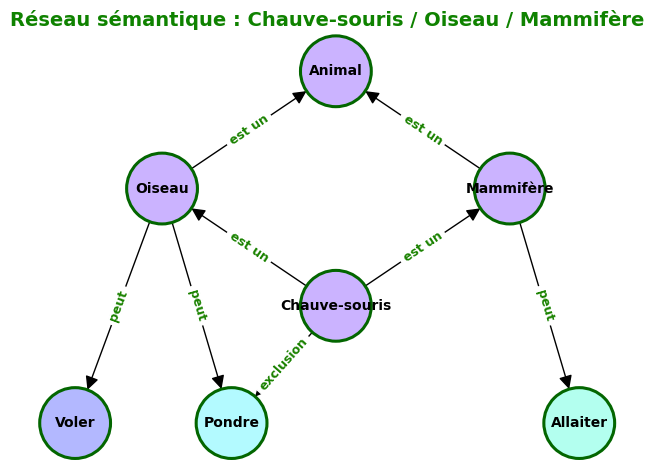

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Création du graphe ---
graph = nx.DiGraph()

# Classes et propriétés
classes = ["Animal", "Oiseau", "Mammifère", "Chauve-souris"]
properties = ["Voler", "Pondre", "Allaiter"]
graph.add_nodes_from(classes + properties)

# Relations hiérarchiques ISA
isa_relations = [
    ("Oiseau", "Animal"),
    ("Mammifère", "Animal"),
    ("Chauve-souris", "Oiseau"),
    ("Chauve-souris", "Mammifère"),
]

# Propriétés / capacités
capabilities = [
    ("Oiseau", "Voler", "peut"),
    ("Oiseau", "Pondre", "peut"),
    ("Mammifère", "Allaiter", "peut"),
    ("Chauve-souris", "Pondre", "exclusion")
]

for a, b in isa_relations:
    graph.add_edge(a, b, relation="est un")

for src, dst, rel in capabilities:
    graph.add_edge(src, dst, relation=rel)

# Positionnement
layout = {
    "Animal": (0, 3),
    "Oiseau": (-2, 2),
    "Mammifère": (2, 2),
    "Chauve-souris": (0, 1),
    "Voler": (-3, 0),
    "Pondre": (-1.2, 0),
    "Allaiter": (2.8, 0),
}

# --- Nouvelle palette de couleurs ---
node_palette = {
    # tons violets pour les classes
    "Animal": "#cbb3ff",
    "Oiseau": "#cbb3ff",
    "Mammifère": "#cbb3ff",
    "Chauve-souris": "#cbb3ff",
    # tons roses pour propriétés
    "Voler": "#b3b8ff",
    "Pondre": "#b3faff",
    "Allaiter": "#b3ffef"
}
node_colors = [node_palette[n] for n in graph.nodes()]

# --- Style des arêtes ---
edge_color = "#32ad0d"       # violet foncé
label_color = "#1a8200"      # indigo foncé
border_color = "#036600"     # contour

# --- Dessin du graphe ---
nx.draw_networkx(
    graph, layout,
    node_color=node_colors,
    node_size=2600,
    arrows=True,
    arrowstyle="-|>",
    arrowsize=20,
    linewidths=2.2,
    edgecolors=border_color,
    font_size=10,
    font_weight="bold"
)

# Étiquettes des relations
edge_lbls = nx.get_edge_attributes(graph, "relation")
nx.draw_networkx_edge_labels(
    graph, layout,
    edge_labels=edge_lbls,
    font_size=9,
    font_weight="bold",
    font_color=label_color
)

plt.title("Réseau sémantique : Chauve-souris / Oiseau / Mammifère",
          fontsize=14, fontweight="bold", color="#0f8200")

plt.axis("off")
plt.tight_layout()
plt.show()


2 — Héritage :

La chauve-souris hérite des propriétés de ses classes parentes :
d’Oiseau, “elle peut voler”, et de Mammifère, “elle allaite ses petits”.
En plus, elle possède une caractéristique propre : elle ne pond pas d’œufs.

3 — Conflits :

On remarque une incohérence : en tant qu’“oiseau”, la chauve-souris devrait pondre, mais sa propriété indique qu’elle ne pond pas d’œufs. Cela crée un conflit entre la règle générale et la réalité biologique.

EXERCICE 2


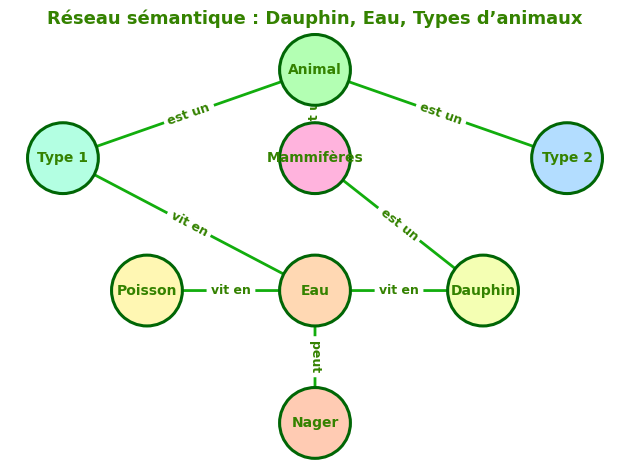

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Graphe ---
G = nx.DiGraph()

noeuds = [
    "Animal", "Type 1", "Type 2", "Mammifères",
    "Poisson", "Eau", "Dauphin", "Nager"
]
G.add_nodes_from(noeuds)

# --- Relations ---
G.add_edge("Type 1", "Animal", relation="est un")
G.add_edge("Type 2", "Animal", relation="est un")
G.add_edge("Mammifères", "Animal", relation="est un")

G.add_edge("Type 1", "Eau", relation="vit en")
G.add_edge("Poisson", "Eau", relation="vit en")
G.add_edge("Dauphin", "Eau", relation="vit en")

G.add_edge("Dauphin", "Mammifères", relation="est un")
G.add_edge("Eau", "Nager", relation="peut")

# --- Position ---
pos = {
    "Animal": (0, 4),
    "Type 1": (-3, 3),
    "Type 2": (3, 3),
    "Mammifères": (0, 3),
    "Eau": (0, 1.5),
    "Poisson": (-2, 1.5),
    "Dauphin": (2, 1.5),
    "Nager": (0, 0)
}

# --- Nouvelle palette violette/rose ---
node_palette = {
    # classes / types → violet clair
    "Animal": "#b3ffb3",
    "Type 1": "#b3ffe2",
    "Type 2": "#b3ddff",
    "Mammifères": "#ffb3dd",
    "Poisson": "#fff7b3",
    "Dauphin": "#f4ffb3",

    # ressources / actions → rose pastel
    "Eau": "#ffd8b3",
    "Nager": "#ffcbb3",
}

node_colors = [node_palette[n] for n in G.nodes()]

# Couleurs des arêtes / contours
edge_color = "#12ad0d"      # violet foncé
border_color = "#006605"    # contour
label_color = "#348200"     # indigo

# --- Dessin ---
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=2600,
    edgecolors=border_color,
    linewidths=2.2
)

nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_weight='bold',
    font_color=label_color
)

nx.draw_networkx_edges(
    G, pos,
    arrowstyle='-|>',
    arrowsize=20,
    width=2,
    edge_color=edge_color
)

edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color=label_color,
    font_size=9,
    font_weight="bold"
)

plt.title(
    "Réseau sémantique : Dauphin, Eau, Types d’animaux",
    fontsize=13,
    fontweight='bold',
    color=label_color
)

plt.axis('off')
plt.tight_layout()
plt.show()


Le dauphin représente une sous-catégorie des mammifères, qui eux-mêmes font partie de la grande famille des animaux.

Le poisson vit dans l’eau, et cette relation entraîne naturellement le lien vers la propriété « peut nager ».

Le dauphin partage également ce milieu de vie ; en tant qu’animal aquatique, il hérite donc lui aussi de cette capacité.

EXERCICE 3

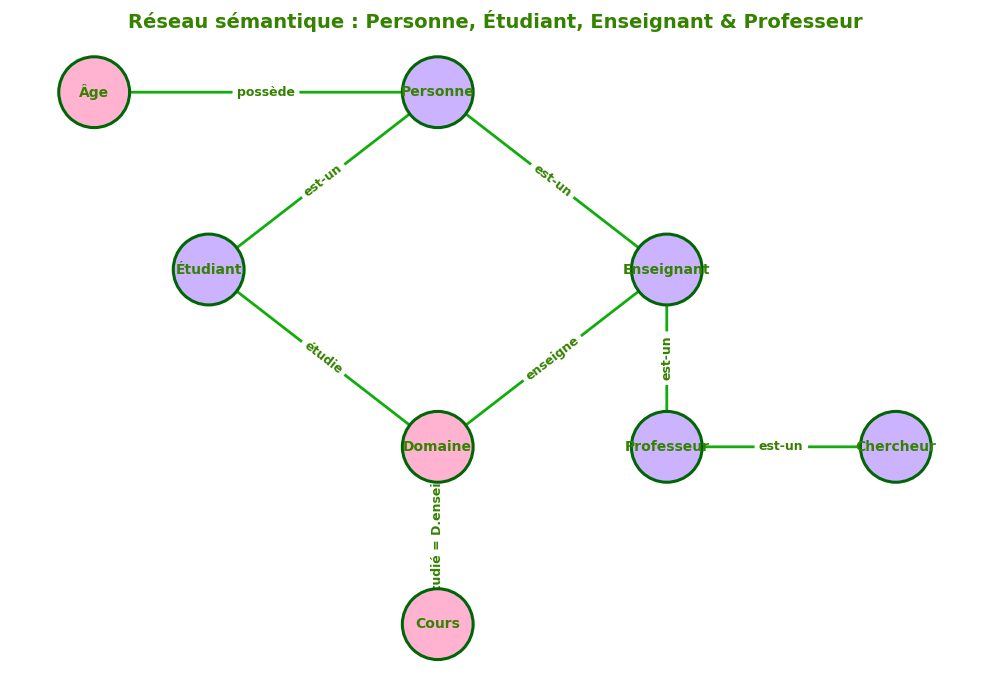

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# --- Noeuds ---
categories = ["Personne", "Étudiant", "Enseignant", "Professeur", "Chercheur"]
proprietes = ["Domaine", "Cours", "Âge"]

G.add_nodes_from(categories + proprietes)

# --- Relations ISA ---
G.add_edge("Étudiant", "Personne", relation="est-un")
G.add_edge("Enseignant", "Personne", relation="est-un")
G.add_edge("Professeur", "Enseignant", relation="est-un")
G.add_edge("Professeur", "Chercheur", relation="est-un")

# --- Propriétés ---
G.add_edge("Personne", "Âge", relation="possède")
G.add_edge("Étudiant", "Domaine", relation="étudie")
G.add_edge("Enseignant", "Domaine", relation="enseigne")
G.add_edge("Cours", "Domaine", relation="D.étudié = D.enseigné")

# --- Positionnement ---
pos = {
    "Personne": (0, 3),
    "Étudiant": (-2, 2),
    "Enseignant": (2, 2),
    "Professeur": (2, 1),
    "Chercheur": (4, 1),
    "Domaine": (0, 1),
    "Cours": (0, 0),
    "Âge": (-3, 3)
}

# --- Palette violette/rose ---
node_palette = {
    # catégories → violet clair
    "Personne": "#cbb3ff",
    "Étudiant": "#cbb3ff",
    "Enseignant": "#cbb3ff",
    "Professeur": "#cbb3ff",
    "Chercheur": "#cbb3ff",

    # propriétés → rose pastel
    "Domaine": "#ffb3d1",
    "Cours": "#ffb3d1",
    "Âge": "#ffb3d1",
}

node_colors = [node_palette[n] for n in G.nodes()]

# Couleurs des arêtes / contours
edge_color = "#12ad0d"      # violet foncé
border_color = "#006605"    # contour
label_color = "#348200"     # indigo foncé

plt.figure(figsize=(10, 7))

# --- Affichage ---
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=2600,
    edgecolors=border_color,
    linewidths=2.2
)

nx.draw_networkx_edges(
    G, pos,
    arrowstyle='-|>',
    arrowsize=25,
    width=2,
    edge_color=edge_color
)

nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_weight='bold',
    font_color=label_color
)

edge_labels = nx.get_edge_attributes(G, 'relation')

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color=label_color,
    font_size=9,
    font_weight='bold'
)

plt.title(
    "Réseau sémantique : Personne, Étudiant, Enseignant & Professeur",
    fontsize=14,
    fontweight='bold',
    color=label_color
)

plt.axis('off')
plt.tight_layout()
plt.show()


La règle selon laquelle « le domaine enseigné doit correspondre au domaine étudié pour un cours donné » exprime une relation d’équivalence qui joue le rôle d’une contrainte d’intégrité dans le réseau sémantique.

Elle impose une correspondance parfaite entre les deux informations liées au cours, empêchant toute divergence entre ce qui est appris et ce qui est enseigné.

Il s’agit donc d’une contrainte de cohérence, puisqu’elle garantit l’homogénéité et la fiabilité des données associées à un même cours.

EXERCICE 4

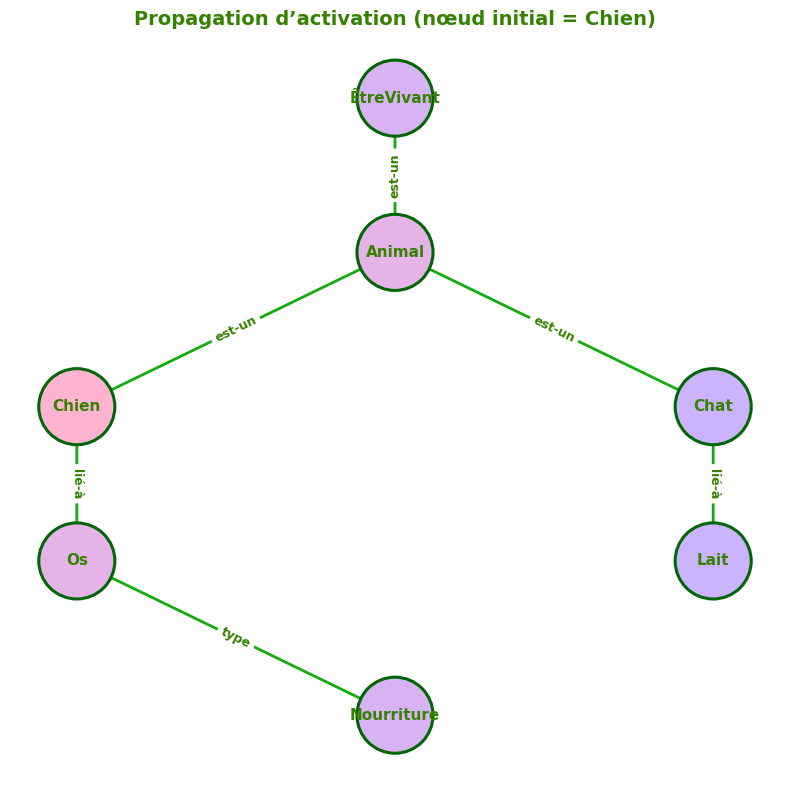

Niveau d'activation après propagation :
Chien        → activation = 1.000
Animal       → activation = 0.500
Os           → activation = 0.500
ÊtreVivant   → activation = 0.250
Nourriture   → activation = 0.250


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = ["ÊtreVivant", "Animal", "Chien", "Chat", "Os", "Lait", "Nourriture"]
G.add_nodes_from(nodes)

# --- Relations ---
G.add_edge("Chien", "Animal", relation="est-un")
G.add_edge("Chat", "Animal", relation="est-un")
G.add_edge("Animal", "ÊtreVivant", relation="est-un")
G.add_edge("Chien", "Os", relation="lié-à")
G.add_edge("Chat", "Lait", relation="lié-à")
G.add_edge("Os", "Nourriture", relation="type")

# --- Position des nœuds ---
pos = {
    "ÊtreVivant": (0, 4),
    "Animal": (0, 3),
    "Chien": (-2, 2),
    "Chat": (2, 2),
    "Os": (-2, 1),
    "Lait": (2, 1),
    "Nourriture": (0, 0)
}

# --- Propagation ---
activation = {"Chien": 1.0}
facteur = 0.5
niveau = 3

for _ in range(niveau):
    new_activation = activation.copy()
    for node, value in activation.items():
        for neighbor in G.successors(node):
            propagated = value * facteur
            if neighbor not in new_activation or propagated > new_activation[neighbor]:
                new_activation[neighbor] = propagated
    activation = new_activation

# --- Normalisation activation ---
max_act = max(activation.values())
colors = []

# --- Palette VIOLET / ROSE (comme les autres exos) ---
for node in G.nodes():
    val = activation.get(node, 0)
    intensity = val / max_act if max_act else 0

    # interpolation entre rose pastel et violet clair
    r = (1 - intensity) * (203/255) + intensity * (255/255)   # violet clair → rose
    g = (1 - intensity) * (179/255) + intensity * (179/255)   # constant
    b = (1 - intensity) * (255/255) + intensity * (209/255)   # violet → rose pastel

    colors.append((r, g, b))

# --- Style des bords et textes ---
edge_color = "#12ad0d"      # violet foncé
border_color = "#006605"    # contour foncé
label_color = "#348200"     # indigo foncé

# --- Affichage ---
plt.figure(figsize=(8, 8))

nx.draw_networkx_nodes(
    G, pos,
    node_color=colors,
    node_size=3000,
    edgecolors=border_color,
    linewidths=2.2
)

nx.draw_networkx_edges(
    G, pos,
    arrowstyle='-|>',
    arrowsize=25,
    width=2,
    edge_color=edge_color
)

nx.draw_networkx_labels(
    G, pos,
    font_size=11,
    font_weight='bold',
    font_color=label_color
)

edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color=label_color,
    font_size=9,
    font_weight="bold"
)

plt.title(
    "Propagation d’activation (nœud initial = Chien)",
    fontsize=14,
    fontweight='bold',
    color=label_color
)

plt.axis('off')
plt.tight_layout()
plt.show()

print("Niveau d'activation après propagation :")
for node, val in activation.items():
    print(f"{node:<12} → activation = {val:.3f}")


EXERCICE 5

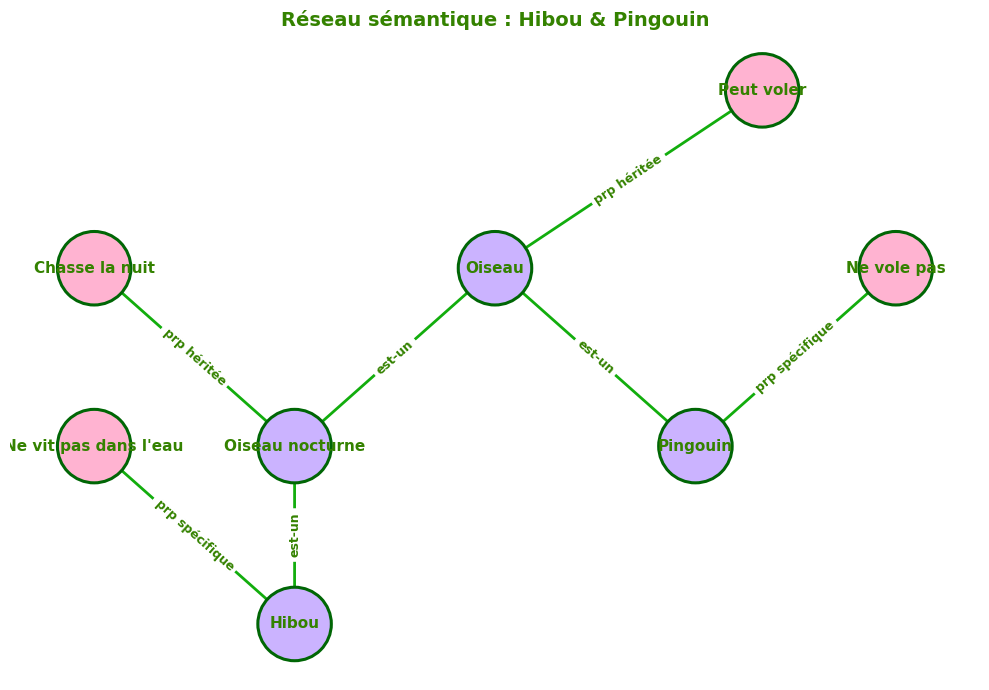

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = [
    "Oiseau", "Oiseau nocturne", "Pingouin", "Hibou",
    "Peut voler", "Ne vole pas", "Chasse la nuit", "Ne vit pas dans l'eau"
]
G.add_nodes_from(nodes)

# --- Relations ---
G.add_edge("Oiseau nocturne", "Oiseau", relation="est-un")
G.add_edge("Hibou", "Oiseau nocturne", relation="est-un")
G.add_edge("Pingouin", "Oiseau", relation="est-un")

G.add_edge("Oiseau", "Peut voler", relation="prp héritée")
G.add_edge("Oiseau nocturne", "Chasse la nuit", relation="prp héritée")
G.add_edge("Pingouin", "Ne vole pas", relation="prp spécifique")
G.add_edge("Hibou", "Ne vit pas dans l'eau", relation="prp spécifique")

# --- Position ---
pos = {
    "Oiseau": (0, 3),
    "Oiseau nocturne": (-1.5, 2),
    "Pingouin": (1.5, 2),
    "Hibou": (-1.5, 1),
    "Peut voler": (2, 4),
    "Ne vole pas": (3, 3),
    "Chasse la nuit": (-3, 3),
    "Ne vit pas dans l'eau": (-3, 2)
}

# --- Palette VIOLET / ROSE ---
node_palette = {
    # catégories
    "Oiseau": "#cbb3ff",
    "Oiseau nocturne": "#cbb3ff",
    "Pingouin": "#cbb3ff",
    "Hibou": "#cbb3ff",

    # propriétés
    "Peut voler": "#ffb3d1",
    "Ne vole pas": "#ffb3d1",
    "Chasse la nuit": "#ffb3d1",
    "Ne vit pas dans l'eau": "#ffb3d1",
}

node_colors = [node_palette[n] for n in G.nodes()]

# Couleurs des arêtes et labels
edge_color = "#12ad0d"      # violet foncé
border_color = "#006605"    # contour violet foncé
label_color = "#348200"     # indigo foncé

plt.figure(figsize=(10, 7))

# --- Dessin des nœuds ---
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=2800,
    edgecolors=border_color,
    linewidths=2.2
)

# --- Arêtes ---
nx.draw_networkx_edges(
    G, pos,
    arrowstyle='-|>',
    arrowsize=25,
    width=2,
    edge_color=edge_color
)

# --- Labels ---
nx.draw_networkx_labels(
    G, pos,
    font_size=11,
    font_weight='bold',
    font_color=label_color
)

edge_labels = nx.get_edge_attributes(G, 'relation')

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color=label_color,
    font_size=9,
    font_weight='bold'
)

plt.title(
    "Réseau sémantique : Hibou & Pingouin",
    fontsize=14,
    fontweight='bold',
    color=label_color
)

plt.axis('off')
plt.tight_layout()
plt.show()


EXERCICE 6

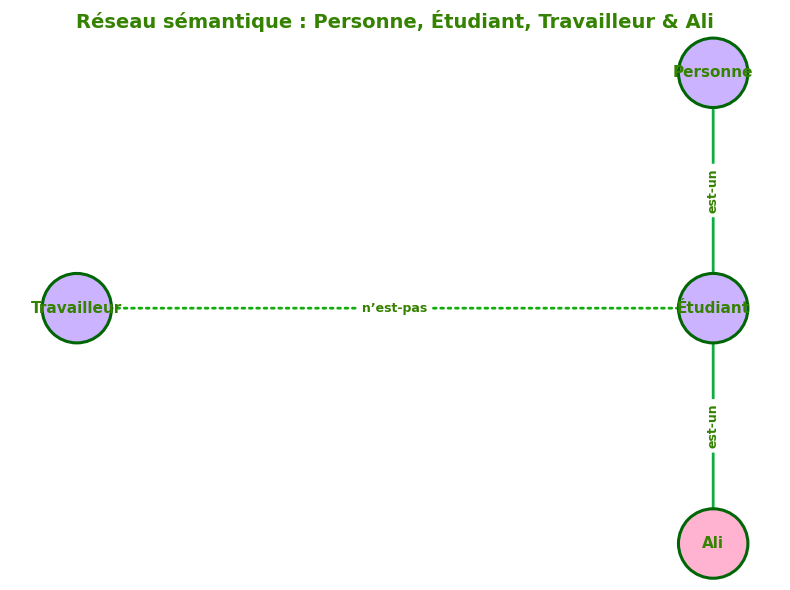

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = ["Personne", "Étudiant", "Travailleur", "Ali"]
G.add_nodes_from(nodes)

# --- Relations ---
G.add_edge("Étudiant", "Personne", relation="est-un")
G.add_edge("Étudiant", "Travailleur", relation="n’est-pas")
G.add_edge("Ali", "Étudiant", relation="est-un")

# --- Position des nœuds ---
pos = {
    "Personne": (0, 3),
    "Étudiant": (0, 2),
    "Travailleur": (-2, 2),
    "Ali": (0, 1)
}

# --- Palette violet / rose ---
node_palette = {
    "Personne": "#cbb3ff",
    "Étudiant": "#cbb3ff",
    "Travailleur": "#cbb3ff",
    "Ali": "#ffb3d1"   # Individu → rose pour le distinguer
}

node_colors = [node_palette[n] for n in G.nodes()]

# --- Styles des arêtes ---
edge_color_normal = "#0dad42"  # violet foncé
edge_color_not = "#12ad0d"     # indigo foncé
border_color = "#006605"       # contours violets
label_color = "#348200"        # texte violet foncé

plt.figure(figsize=(8, 6))

# --- Dessin des nœuds ---
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=2500,
    edgecolors=border_color,
    linewidths=2.2
)

# --- Dessin des labels ---
nx.draw_networkx_labels(
    G, pos,
    font_size=11,
    font_weight='bold',
    font_color=label_color
)

# --- Styles d'arêtes selon le type ---
for u, v, data in G.edges(data=True):
    relation = data['relation']

    if relation == "est-un":
        style = "solid"
        color = edge_color_normal
    elif relation == "n’est-pas":
        style = "dotted"
        color = edge_color_not
    else:
        style = "dashed"
        color = edge_color_normal

    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        style=style,
        width=2,
        arrowstyle='-|>',
        arrowsize=25,
        edge_color=color
    )

# --- Labels d'arêtes ---
edge_labels = nx.get_edge_attributes(G, "relation")
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color=label_color,
    font_size=9,
    font_weight="bold"
)

plt.title(
    "Réseau sémantique : Personne, Étudiant, Travailleur & Ali",
    fontsize=14,
    fontweight='bold',
    color=label_color
)

plt.axis('off')
plt.tight_layout()
plt.show()


EXERCICE 7

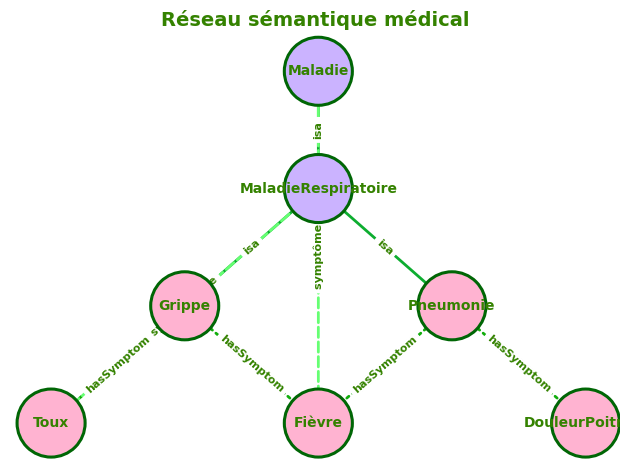

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = ["Maladie", "MaladieRespiratoire", "Grippe", "Pneumonie",
         "Fièvre", "Toux", "DouleurPoitrine"]
G.add_nodes_from(nodes)

# --- Relations isa ---
G.add_edge("MaladieRespiratoire", "Maladie", relation="isa")
G.add_edge("Grippe", "MaladieRespiratoire", relation="isa")
G.add_edge("Pneumonie", "MaladieRespiratoire", relation="isa")

# --- Symptômes ---
G.add_edge("Grippe", "Fièvre", relation="hasSymptom")
G.add_edge("Grippe", "Toux", relation="hasSymptom")
G.add_edge("Pneumonie", "Fièvre", relation="hasSymptom")
G.add_edge("Pneumonie", "DouleurPoitrine", relation="hasSymptom")

G.add_edge("Fièvre", "Maladie", relation="symptôme de")
G.add_edge("Toux", "MaladieRespiratoire", relation="symptôme de")

# --- Position du graphe ---
pos = {
    "Maladie": (0, 4),
    "MaladieRespiratoire": (0, 3),
    "Grippe": (-1, 2),
    "Pneumonie": (1, 2),
    "Fièvre": (0, 1),
    "Toux": (-2, 1),
    "DouleurPoitrine": (2, 1)
}

# --- Palette violet / rose (uniforme avec tous tes exos) ---
node_palette = {
    "Maladie": "#cbb3ff",
    "MaladieRespiratoire": "#cbb3ff",
    "Grippe": "#ffb3d1",
    "Pneumonie": "#ffb3d1",
    "Fièvre": "#ffb3d1",
    "Toux": "#ffb3d1",
    "DouleurPoitrine": "#ffb3d1",
}

node_colors = [node_palette[n] for n in G.nodes()]

# Couleurs des arêtes / labels
edge_color_isa = "#0dad30"         # violet foncé
edge_color_other = "#66ff73"       # violet pastel
edge_color_symptom = "#12ad0d"     # indigo foncé
border_color = "#006605"           # contour violet foncé
label_color = "#348200"            # texte indigo foncé

# --- Dessin des nœuds ---
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=2400,
    edgecolors=border_color,
    linewidths=2.2
)

# --- Styles d'arêtes selon relation ---
for u, v, data in G.edges(data=True):
    rel = data["relation"]

    if rel == "isa":
        style = "solid"
        color = edge_color_isa
    elif rel == "hasSymptom":
        style = "dotted"
        color = edge_color_symptom
    else:
        style = "dashed"
        color = edge_color_other

    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        style=style,
        width=2,
        arrowstyle='-|>',
        arrowsize=25,
        edge_color=color
    )

# --- Labels ---
nx.draw_networkx_labels(
    G, pos,
    font_size=10,
    font_weight='bold',
    font_color=label_color
)

edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color=label_color,
    font_size=8,
    font_weight='bold'
)

plt.title(
    "Réseau sémantique médical",
    fontsize=14,
    fontweight='bold',
    color=label_color
)

plt.axis('off')
plt.tight_layout()
plt.show()
